<a href="https://colab.research.google.com/github/prasanth5reddy/D2L/blob/master/Multilayer%20Perceptrons/numerical_stability_and_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab/D2L.AI/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installing Libraries

In [2]:
!pip install mxnet

Importing Libraries

In [0]:
%matplotlib inline
import mxnet as mx
from mxnet import nd, autograd
from matplotlib import pyplot as plt

Vanishing Gradients

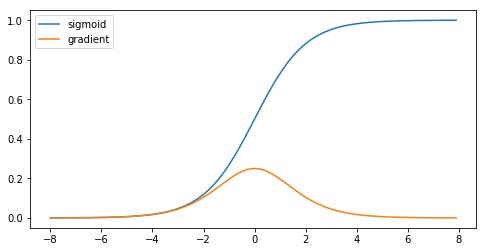

In [4]:
x = nd.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
  y = x.sigmoid()
  
y.backward()

plt.figure(figsize=(8, 4))
plt.plot(x.asnumpy(), y.asnumpy())
plt.plot(x.asnumpy(), x.grad.asnumpy())
plt.legend(['sigmoid', 'gradient'])
plt.show()

Exploding Gradients

In [5]:
M = nd.random.normal(shape=(4,4))
print('A single matirx', M)
for i in range(100):
  M = nd.dot(M, nd.random.normal(shape=(4,4)))
  
print('After multiplying 100 matrices', M)

A single matirx 
[[ 2.2122064   0.7740038   1.0434403   1.1839255 ]
 [ 1.8917114  -1.2347414  -1.771029   -0.45138445]
 [ 0.57938355 -1.856082   -1.9768796  -0.20801921]
 [ 0.2444218  -0.03716067 -0.48774993 -0.02261727]]
<NDArray 4x4 @cpu(0)>
After multiplying 100 matrices 
[[ 3.1575103e+20 -5.0051929e+19  2.0564987e+21 -2.3741814e+20]
 [-4.6332597e+20  7.3444905e+19 -3.0176524e+21  3.4838102e+20]
 [-5.8487126e+20  9.2711797e+19 -3.8092833e+21  4.3977313e+20]
 [-6.2947168e+19  9.9783495e+18 -4.0997847e+20  4.7331007e+19]]
<NDArray 4x4 @cpu(0)>
